# **Introduction**

In this project, we build a machine learning (ML) model, create a restful API for the model and finally containerize the application with Docker.

We use the cross-industry standard process for data mining (CRISP-DM) to guide the project, following the following steps:
- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment


# **Business Understanding** 

### Business Objectives
1. Sepsis Prediction: Build a reliable and accurate ML model to predict sepsis, contributing to early detection and intervention

2. Model Confidentiality: Ensure the ML model architecture remains confidential while providing prediction services through an API

3. Accessibility: Enable users to interact with the sepsis prediction model via an easy-to-use API, making it accessible to those who already use APIs in their workflows

4. Scalability: Develop an API that can handle multiple requests efficiently, ensuring it can scale as the number of users increases.

### Project Goals
1. To build a reliable and accurate ML model to predict sepsis
2. To create an easy-to-use API using FastAPI to embed the model and provide accessibility to users

### Hypothesis
Ho: High body mass indes (M11) has no effect on the development of sepsis in patients

H1: High body mass index is associated with the development of sepsis in patients

### Analytical Questions
1. How does the level of plasma glucose (PRG) affect the outcome of the sepsis test?
2. Do bloodwork results (PL, SK, TS, BD2) have an effect on whether sepsis is negative or positive?
3. What is the relationship between blood pressure (PR) and whether a patient will develop sepsis?
4. What is the relationship between body mass index (M11) and whether a patient will develop sepsis?
5. What is the relationship between age and development of sepsis?
6. What is the relationship between having an insurance or not and development of sepsis?

### Project Tools
- VS Code
- FastAPI
- Docker

### Timeline
- Wk 1 - Data understanding, preparation
- Wk 2 - Modelling, evaluation
- Wk 3 - Building API, deployment
- Wk 4 - Containerization, API performance evaluation




# **Data Understanding**

### Load Data Processing Packages


In [37]:
# Data handling packages 
import pandas as pd
import numpy as np 

# Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Feature Processing packages
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, FunctionTransformer

# Machine Learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Hyperparameters Fine-tuning packages
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


#

### **Load Dataset**

In [38]:
# Load sepsis training data
training_data = pd.read_csv('../Data/Paitients_Files_Train.csv')
training_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [39]:
# Load sepsis test data
test_data = pd.read_csv('../Data/Paitients_Files_Test.csv')
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


### **Exploratory Data Analysis (EDA)**

EDA on training_data

In [40]:
# check general information
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [41]:
# Check data description
training_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [42]:
# view column data types
training_data.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [43]:
# check for nulls
training_data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [44]:
# check for duplicates
training_data.duplicated().sum()

np.int64(0)

EDA on test_data

In [45]:
# check general information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [46]:
# check statistical description
test_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


In [47]:
# check datatypes
test_data.dtypes 

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
dtype: object

In [48]:
# check for nulls
test_data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [49]:
# check for duplicates
test_data.duplicated().sum()

np.int64(0)

#### Key Insights from EDA
- There are 11 columns in the training data and 10 in test data
- Thare are no nulls in both datasets
- There no duplicates in both datasets
- All datatypes are correct
- Datatypes in traioning and test data all align
- Sepsis column appears as sepssis
- column names do not have a consistent case and naming style

Actions:
- Proceed to use data
- write proper column name for sepsis column
- change all column names to lowercase

### **Univariate Analysis**

In [50]:
# Notes
# Univariate analysis involves looking at the distribution of a single variable or dataset.
# It is an excellent way to understand a dataset's range and spread of data. 


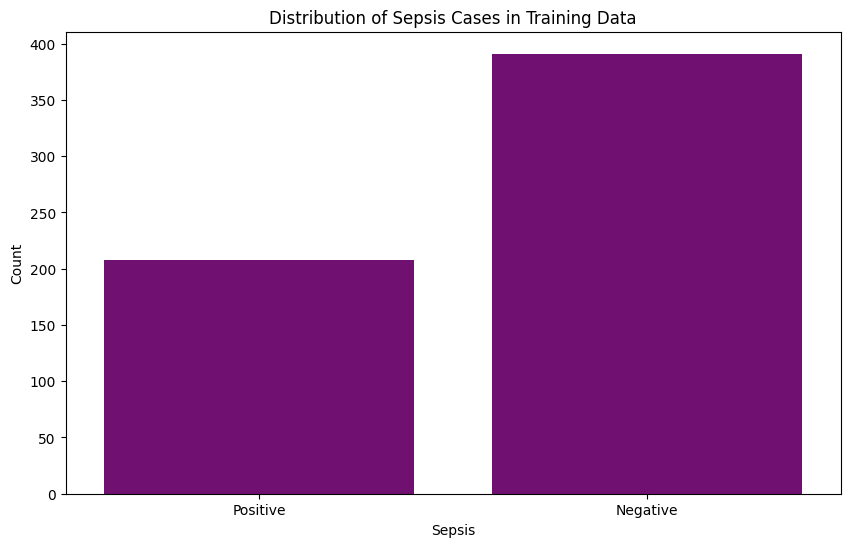

In [51]:
# Examine number of sepsis test outcomes

plt.figure(figsize=(10, 6))
sns.countplot(data=training_data, x='Sepssis', color='purple')
plt.title('Distribution of Sepsis Cases in Training Data')
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.show()


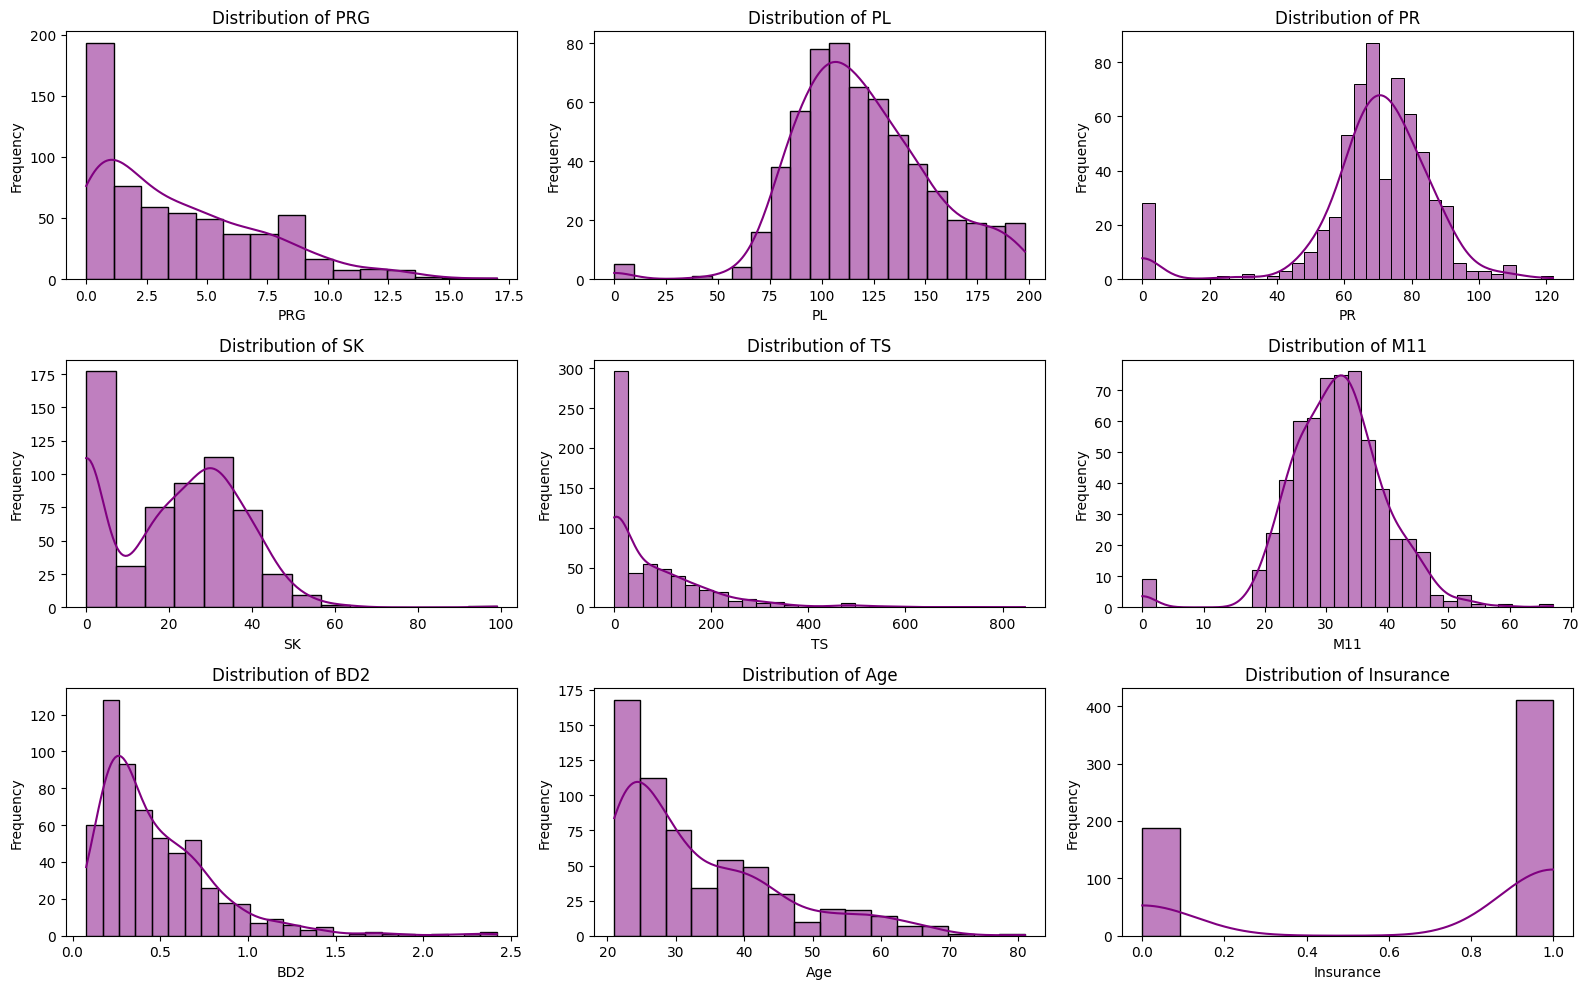

In [52]:
# Visualize the distribution of each column using a histogram
# List of columns to plot (excluding 'ID' column)
columns_to_plot = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

# Create a figure with subplots
plt.figure(figsize=(16, 10))

# Loop through each column and create a histogram
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns, ith subplot
    sns.histplot(data=training_data, x=column, color='purple', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Key Insights
Univariate Analysis
- PRG, BD2, Age, TS are positively skew, there is a high frequency of low PRG measurements
- PL, PR, and M11 are normally distributed with little negative skewness due to an outlier, see long tail and rise to the left
- Insurance is not normally distributed due to its categorical nature, (1 and 0) i.e Yes and No

### **Bivariate Analysis**

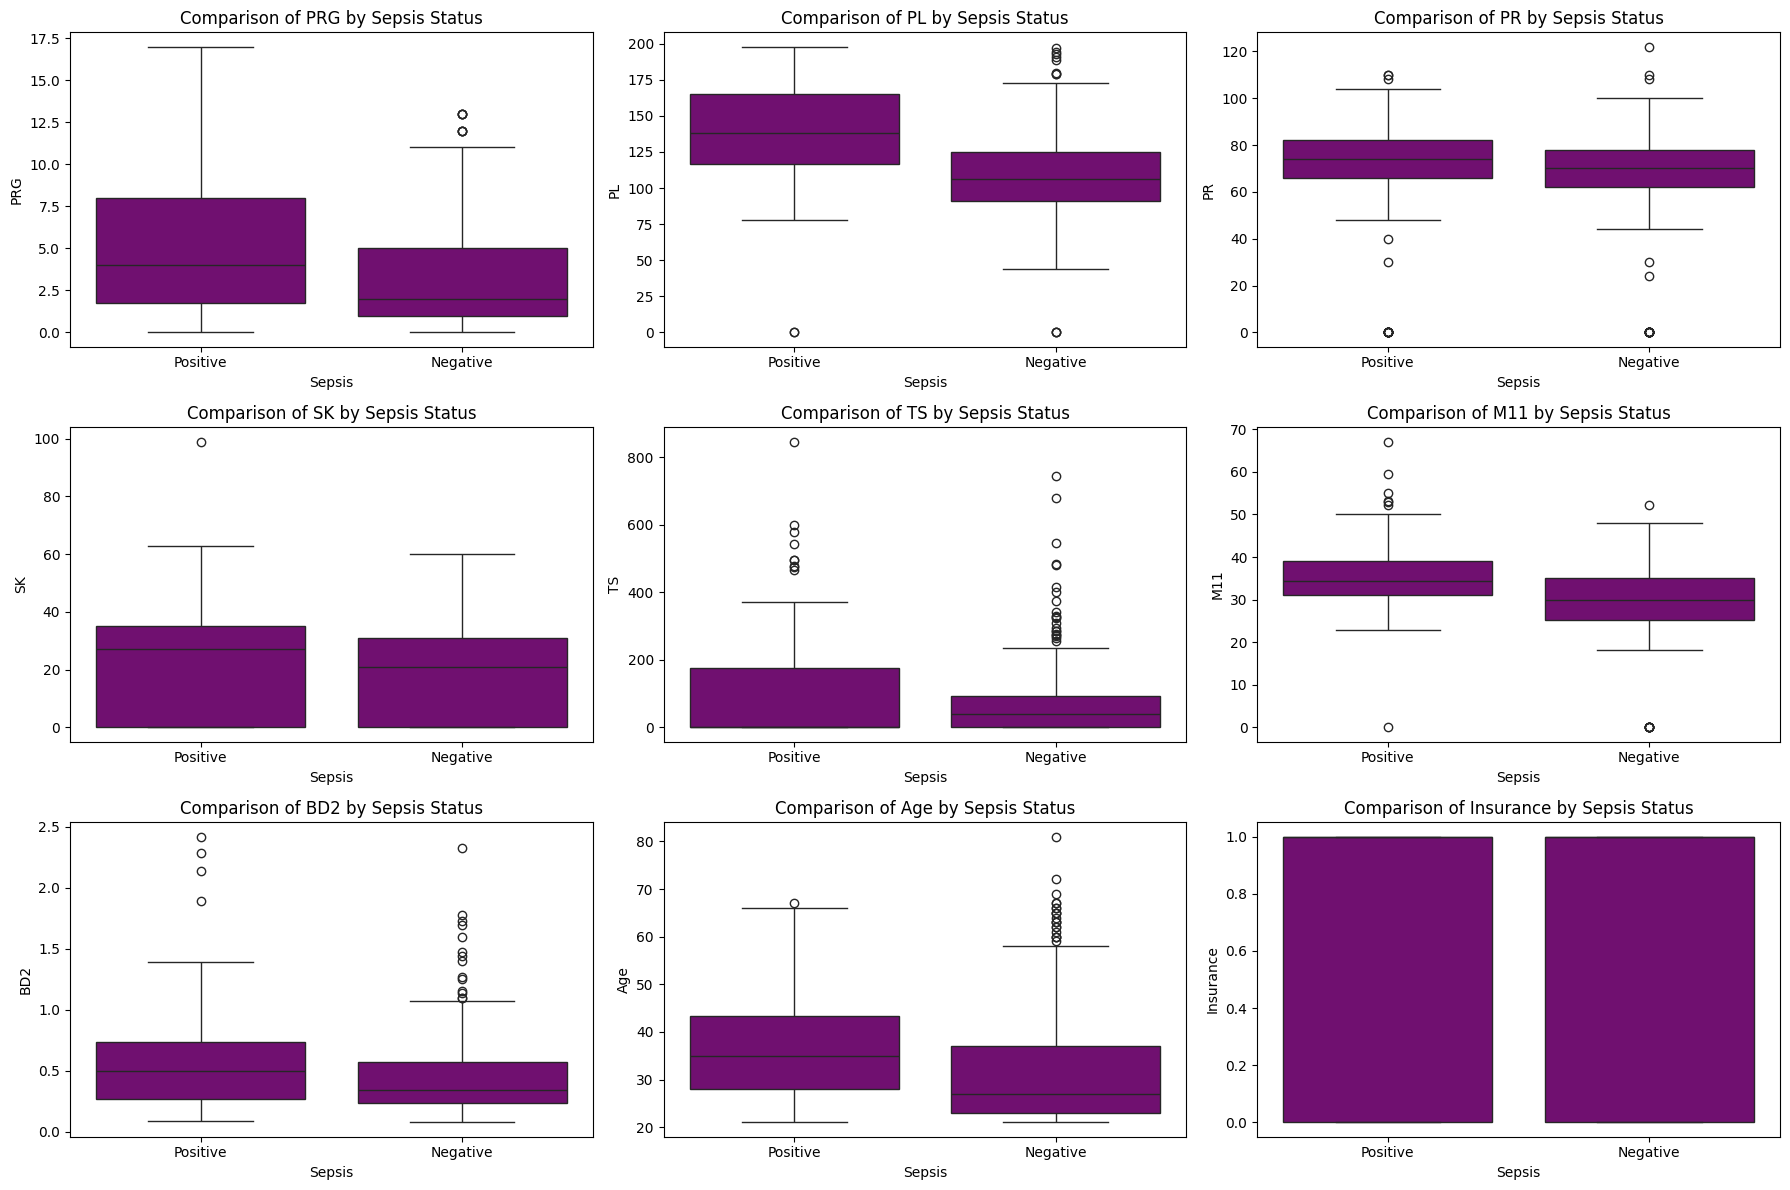

In [53]:
# Compare sepsis distribution with each of the numerical columns
# use boxplot to see outliers

# List of numeric columns to compare
numeric_columns = training_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create subplots for each numeric column
plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Sepssis', y=column, data=training_data, color='purple')
    plt.title(f'Comparison of {column} by Sepsis Status')
    plt.xlabel('Sepsis')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


### Key Insights
Bivariate Analysis
- Each of the columns have a couple of outliers, suggesting that there are patients with abnormal measurements o each of the tests
- Lowest correlation is between SK and Age at -0.12
- Highest correlation is between insurance and age at 0.054


### **Multivariate Analysis**

<Figure size 1800x1200 with 0 Axes>

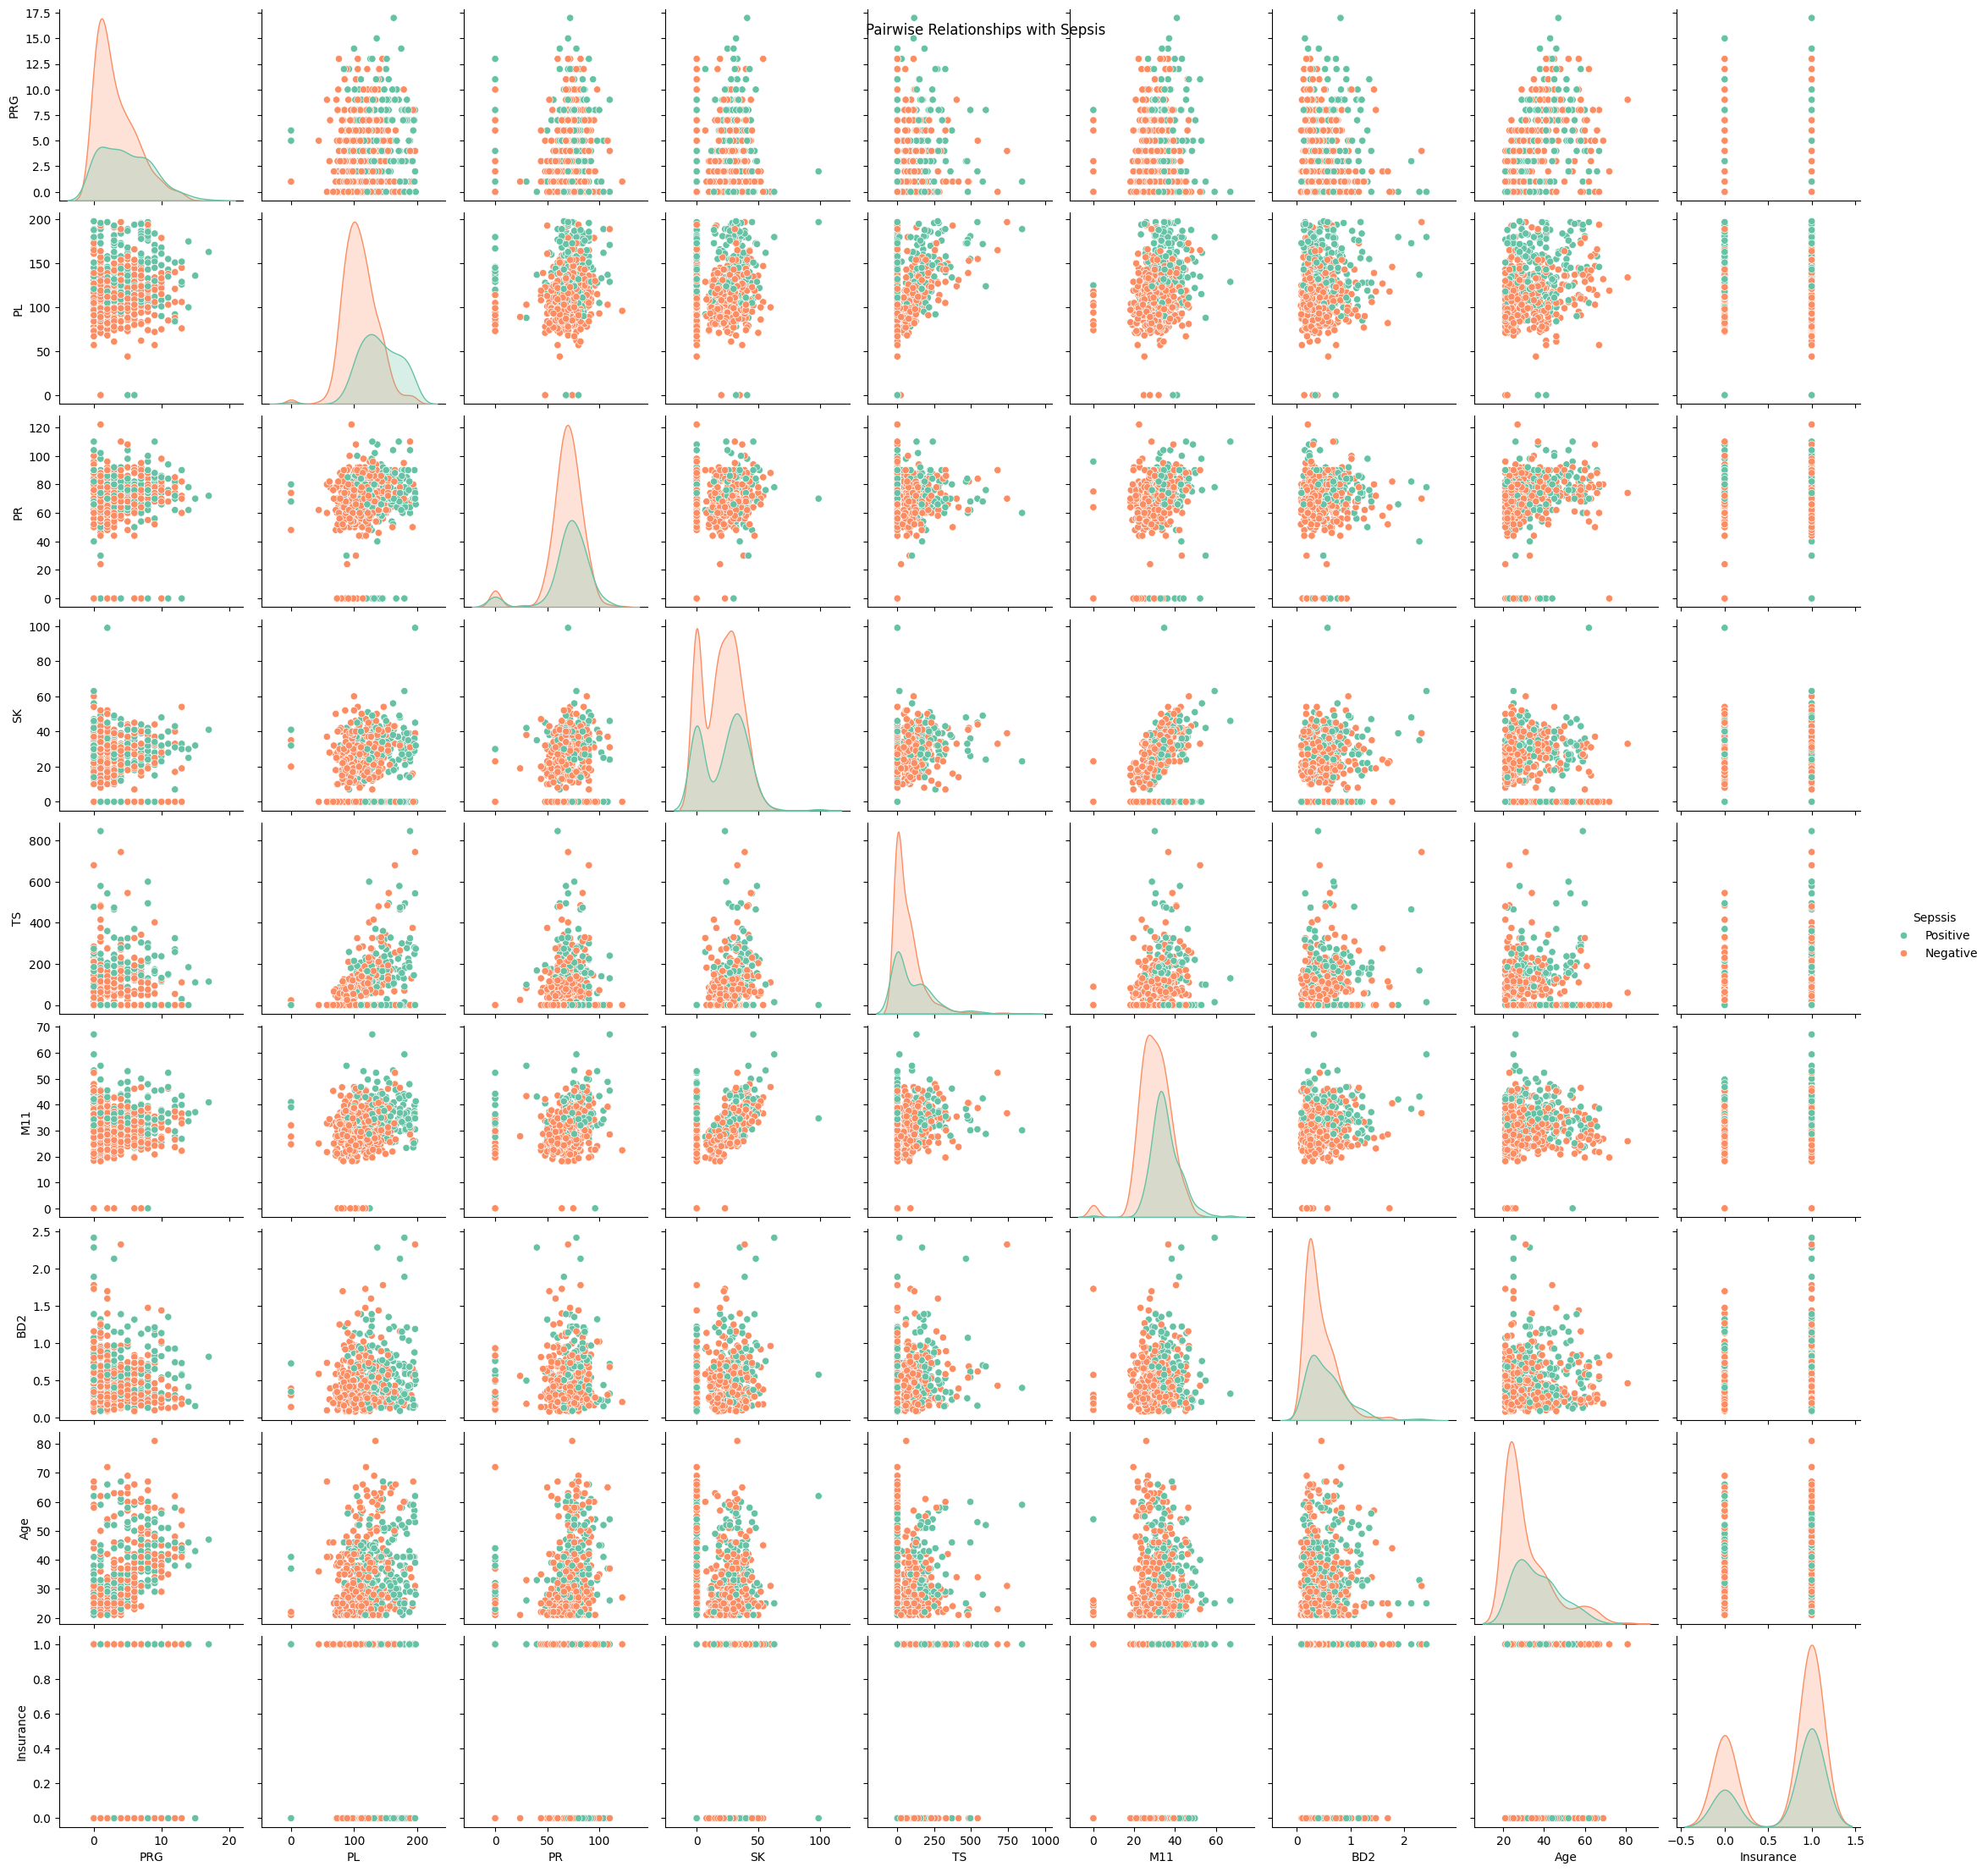

In [54]:
# Pairwise scatter plots of the numeric columns with hue by 'Sepsis' 

plt.figure(figsize=(18,12))
sns.pairplot(training_data, vars=numeric_columns, hue='Sepssis', palette='Set2')
plt.suptitle('Pairwise Relationships with Sepsis')
plt.show()


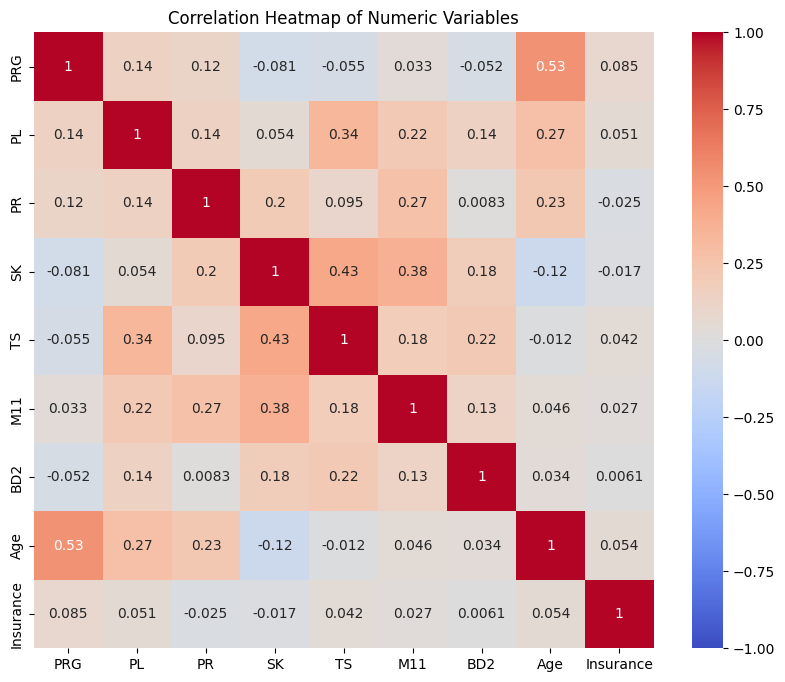

In [55]:

# Calculate correlation matrix
corr_matrix = training_data[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


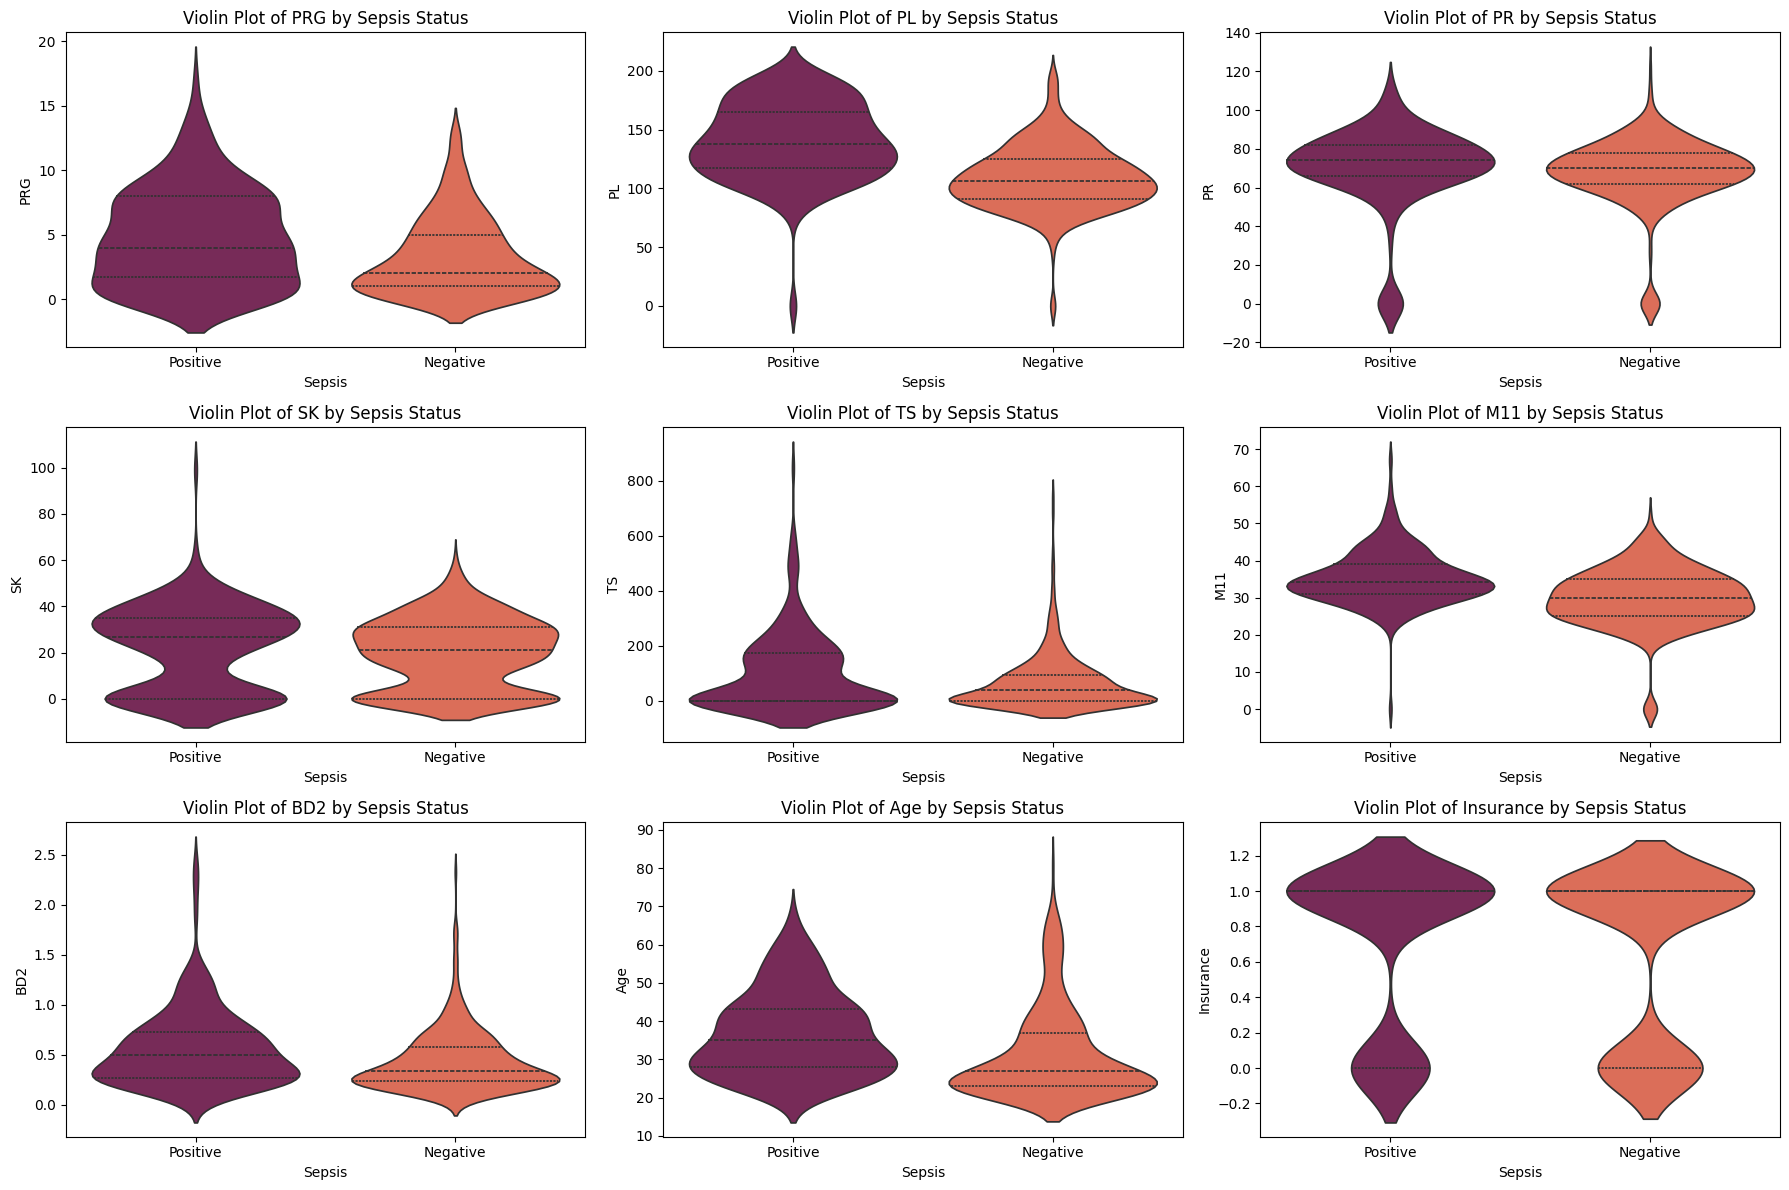

In [56]:

# Create violin plots for each numeric variable, segmented by 'Sepsis'
plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='Sepssis', y=column, data=training_data, hue='Sepssis', palette='rocket', inner='quartile')
    plt.title(f'Violin Plot of {column} by Sepsis Status')
    plt.xlabel('Sepsis')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


### Key Insights
Multivariate Analysis
- Lowest correlation is between SK and Age at -0.12
- Highest correlation is between insurance and age at 0.054
- PRG (Plasma Glucose): Number of positive sepsis cases increases with an increase in PRG: plasma glucose
- Age: No. of positive cases is high at 30 years of age, also no. or negative cases is high below 30 years, after which positive cases increase and reduce after 60 years old
- Distirbution of negative and positive cases tends to be same at optimal levels of the tests with slight variations as they increase or decrease


### **Analytical Questions**

#### 1. How does the level of plasma glucose (PRG) affect the outcome of the sepsis test?

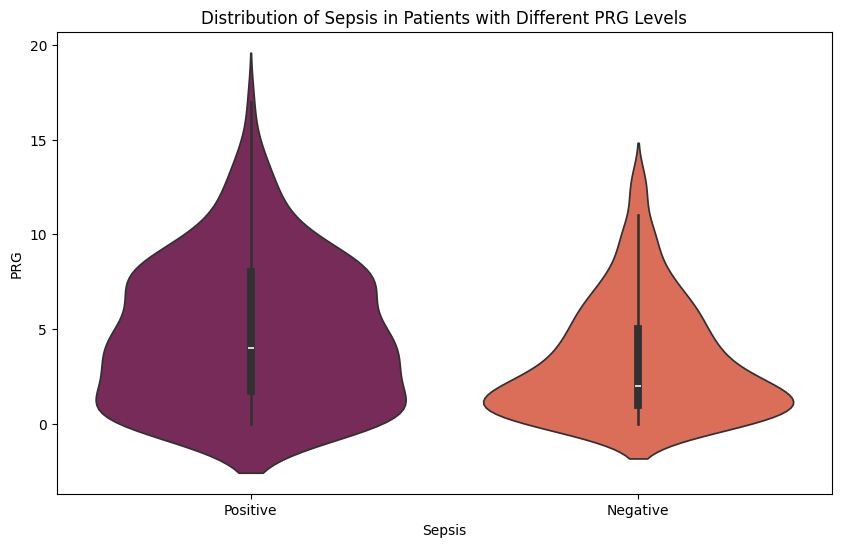

In [57]:
# check relationship between sepsis and PRG
# use a violinplot to see distribution of sepsis for patients with various PRG levels

plt.figure(figsize=(10,6))
sns.violinplot(data=training_data, x='Sepssis', y='PRG', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis in Patients with Different PRG Levels')
plt.xlabel('Sepsis')
plt.ylabel('PRG')
plt.show()


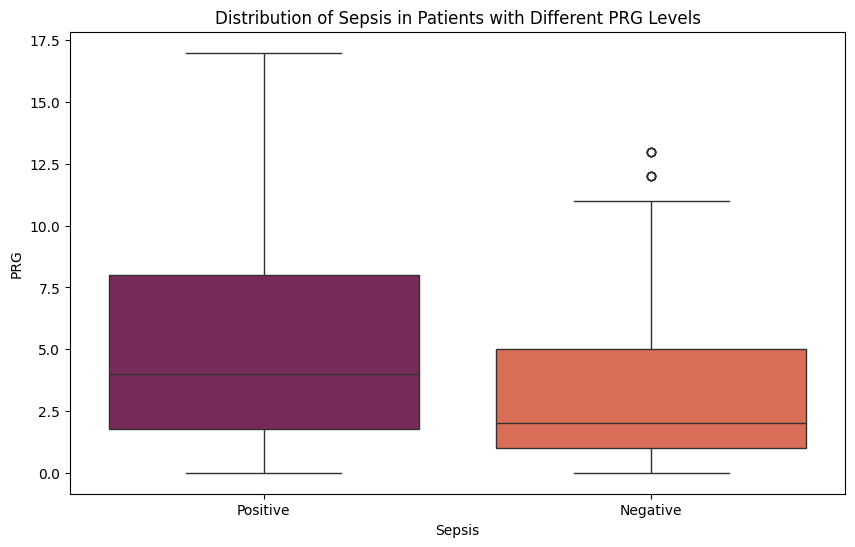

In [58]:
# check relationship between sepsis and PRG
# use a boxplot to see outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=training_data, x='Sepssis', y='PRG', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis in Patients with Different PRG Levels')
plt.xlabel('Sepsis')
plt.ylabel('PRG')
plt.show()


- As the PRG levels increase, negative cases decrease and more positive cases are prevalent between levels above 0 and below 10
- Some patients will test negative in PRG levels between 0-10, implying that there other factors affecting sepsis development
- All patients with PRG levels above 15 test positive for sepsis. There are two outlier patients with negative tests and high PRG
- Implies that higher PRG levels in a patient can lead to the possible development of sepsis. However, other active factors must be investigated


#### 2. Do bloodwork results (PL, SK, TS, BD2) have an effect on whether sepsis is negative or positive?

PL - 1st Bloodwork Result

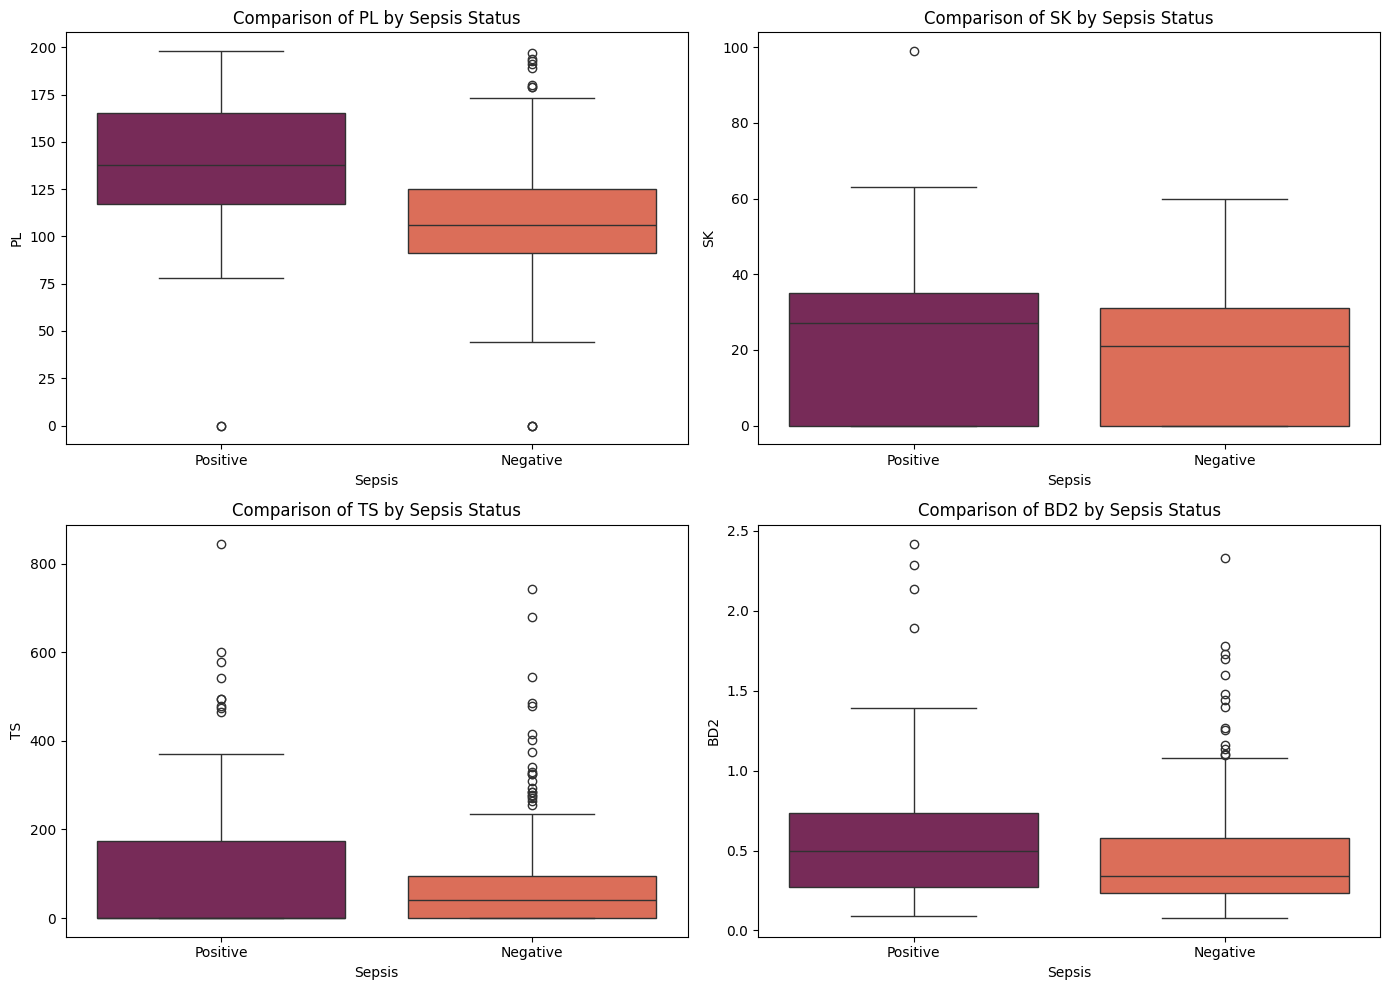

In [59]:
# Create scatter plot of the four sets of bloodwork
# List of columns with bloodwork
bloodwork_columns = ['PL', 'SK', 'TS', 'BD2']

# Create subplots for each numeric column
plt.figure(figsize=(14, 10))

for i, column in enumerate(bloodwork_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Sepssis', y=column, data=training_data, hue='Sepssis', palette='rocket')
    plt.title(f'Comparison of {column} by Sepsis Status')
    plt.xlabel('Sepsis')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

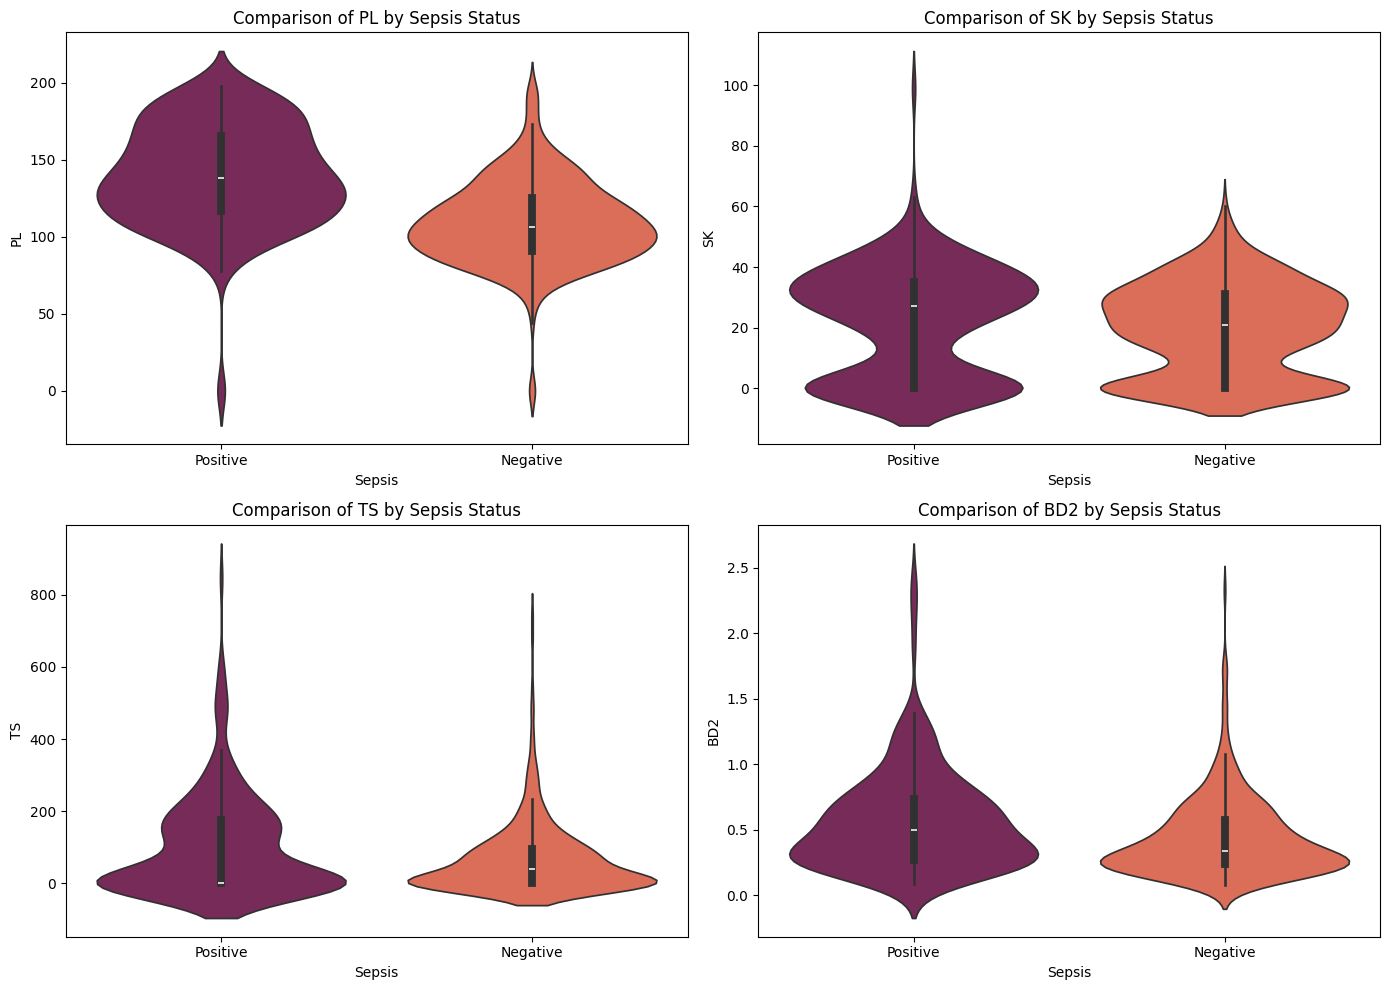

In [60]:
# Create Violin plot of the four sets of bloodwork
# Create subplots for each numeric column
plt.figure(figsize=(14, 10))

for i, column in enumerate(bloodwork_columns, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Sepssis', y=column, data=training_data, hue='Sepssis', palette='rocket')
    plt.title(f'Comparison of {column} by Sepsis Status')
    plt.xlabel('Sepsis')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

- Patients with higher PL levels have more positive sepsis cases
- There are more positive and negative cases when TS and SK are 0. Number of cases begins to reduce as their levels increase
- Number of positive cases are more as BD2 levels increase, but reduce ar levels higher than 1.5
- There are many outliers in the data, meaning there are patients who taste positive or negative regardless of high or low bloodwork
levels. Therefore, further investigations are needed to know why these patients are outliers.

#### 3. What is the relationship between blood pressure (PR) and whether a patient will develop sepsis?

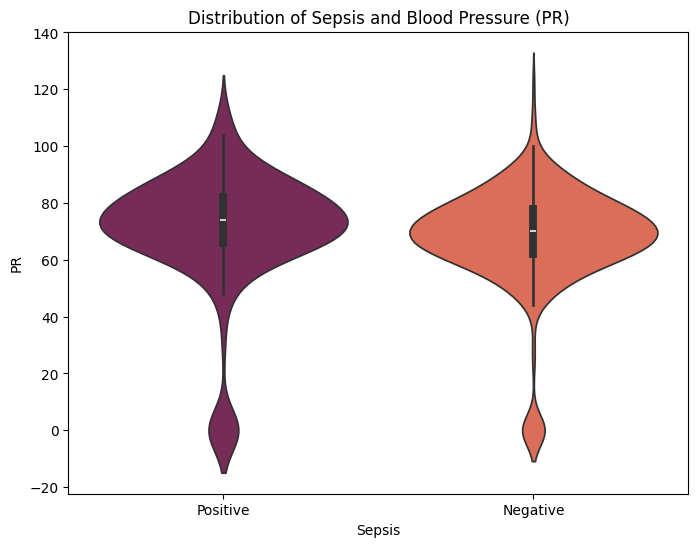

In [61]:
# Use a violinplot to visualize distribution and boxplot to see outliers
# Create violinplot

plt.figure(figsize=(8,6))
sns.violinplot(data=training_data, x='Sepssis', y='PR', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis and Blood Pressure (PR)')
plt.xlabel('Sepsis')
plt.ylabel('PR')
plt.show()


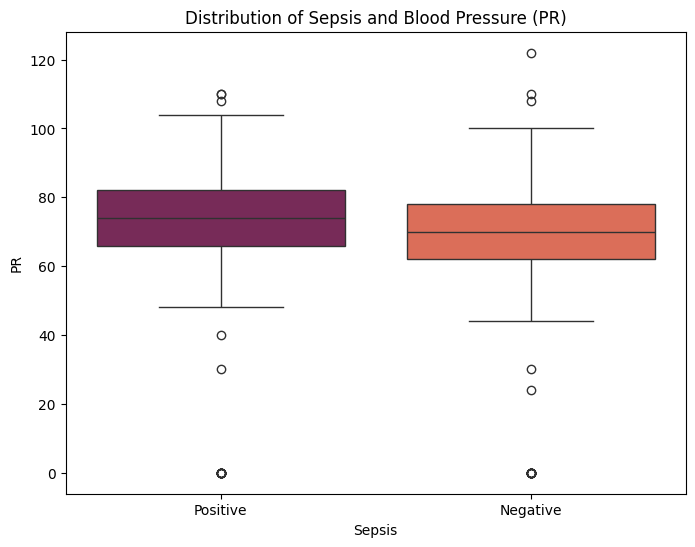

In [62]:
# check relationship between sepsis and PR
# use a boxplot to see outliers

plt.figure(figsize=(8,6))
sns.boxplot(data=training_data, x='Sepssis', y='PR', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis and Blood Pressure (PR)')
plt.xlabel('Sepsis')
plt.ylabel('PR')
plt.show()


- Number of positive cases increases above 40 until below 80 where cases begin to reduce
- No. or negative cases also increases in the same trend but with a lower mean
- There are outliers, two patients who test positive and 2 negative at low PR levels and high levels, 2 & 3 respectively
- Tests at zero PR levels may imply errors

#### 4. What is the relationship between body mass index (M11) and whether a patient will develop sepsis?

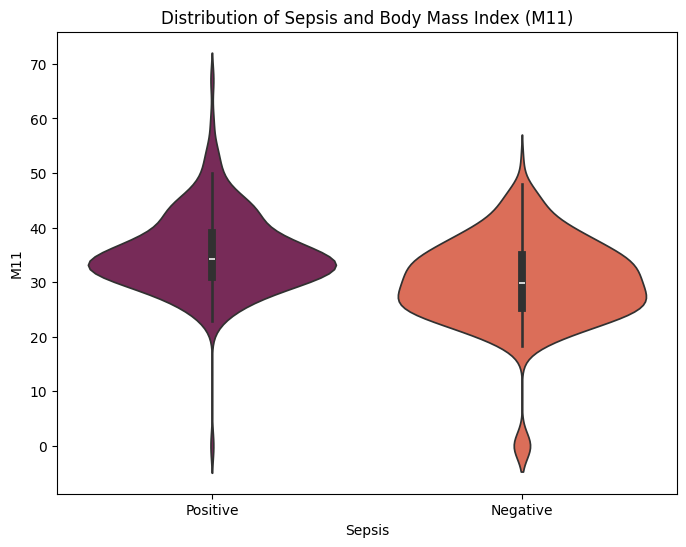

In [63]:
# check relationship between sepsis andM11
# use a violinplot to see outliers

plt.figure(figsize=(8,6))
sns.violinplot(data=training_data, x='Sepssis', y='M11', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis and Body Mass Index (M11)')
plt.xlabel('Sepsis')
plt.ylabel('M11')
plt.show()


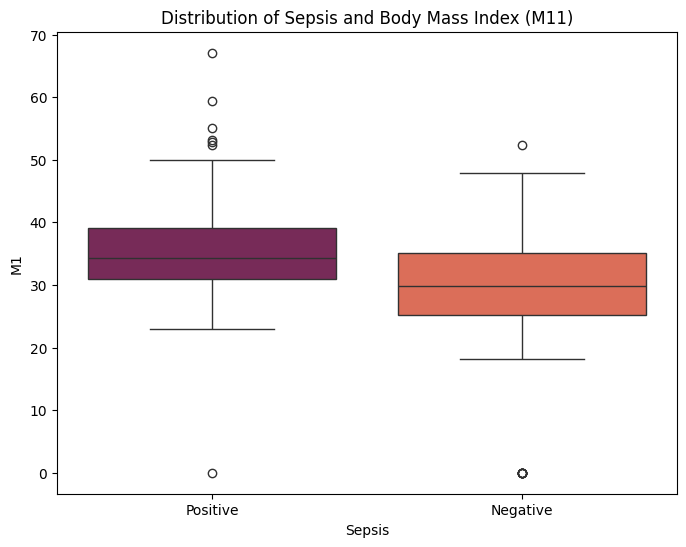

In [64]:
# use a boxplot to see outliers

plt.figure(figsize=(8,6))
sns.boxplot(data=training_data, x='Sepssis', y='M11', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis and Body Mass Index (M11)')
plt.xlabel('Sepsis')
plt.ylabel('M1')
plt.show()


- There are more negative cases when body mass index is above 20 and below 35
- Positive cases are more when BMI is between 30 and 45
- Higher mean in the positive cases shows that higher BMI results in more positive cases of sepsis
- Also there are more outliers with high BMI and positive sepsis cases

#### 5. What is the relationship between age and development of sepsis?


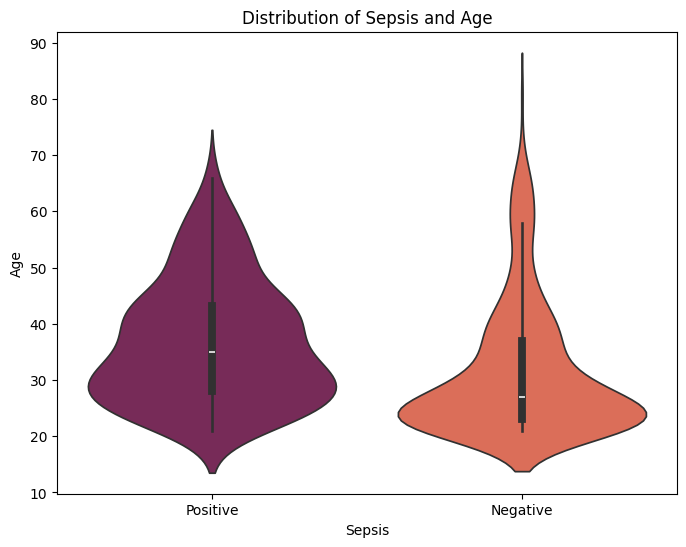

In [65]:
# use a violinplot

plt.figure(figsize=(8,6))
sns.violinplot(data=training_data, x='Sepssis', y='Age', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis and Age')
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.show()


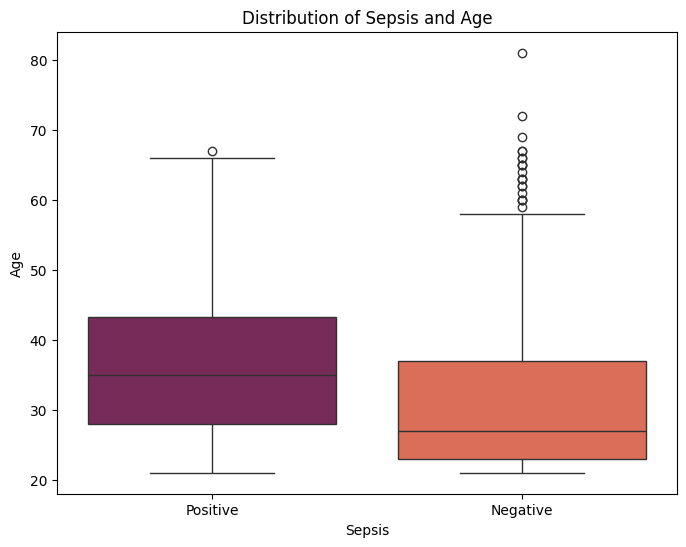

In [66]:
# use a boxplot to see outliers

plt.figure(figsize=(8,6))
sns.boxplot(data=training_data, x='Sepssis', y='Age', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis and Age')
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.show()


- There are more positive sepsis cases at higher ages
- Number of negative cases is seen in older patients
- Largest number of negative cases is among patients between age 20-30
- Age 30-60 has higher number of sepsis positive cases
- There are outliers (patients) with negative sepsis results at Age 60 and above

#### 6. What is the relationship between having an insurance or not and development of sepsis?

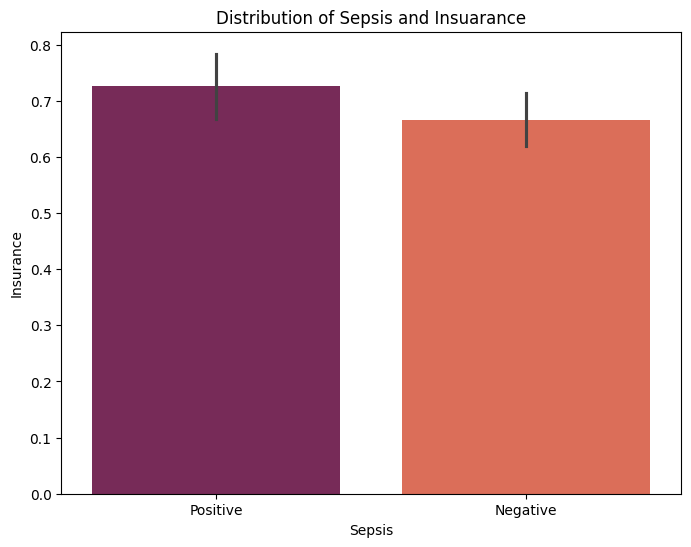

In [67]:
# Use a barplot

plt.figure(figsize=(8,6))
sns.barplot(data=training_data, x='Sepssis', y='Insurance', hue='Sepssis', palette='rocket')
plt.title('Distribution of Sepsis and Insuarance')
plt.xlabel('Sepsis')
plt.ylabel('Insurance')
plt.show()


- Patients with insurance and without insurance have almost a similar number of positive and negative cases
- There are more positive cases among patients with insurance

### **Key Action Points from Data Understanding**
- Clean column names
- Change insurance to categorical Yes and No Datatype instead of 1 and 0


#### **Clean Datasets**

Training Data

In [68]:
# change sepssis column name to sepsis
# Rename the column 'Sepssis' to 'Sepsis'
training_data.rename(columns={'Sepssis': 'Sepsis'}, inplace=True)
training_data.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive


In [69]:

# change all column names to lwercase for consistency
training_data.columns = training_data.columns.str.lower()
training_data.head(2)

,id,prg,pl,pr,sk,ts,m11,bd2,age,insurance,sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative


In [70]:
# drop id column since it is not necessary
training_data.drop(columns=['id'], inplace=True)
training_data.head(2)

,prg,pl,pr,sk,ts,m11,bd2,age,insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative


In [71]:

# change insurance 0 and 1 to Yes and No
training_data['insurance'] = training_data['insurance'].map({0: 'No', 1: 'Yes'})
training_data.head(2)


,prg,pl,pr,sk,ts,m11,bd2,age,insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,No,Positive
1,1,85,66,29,0,26.6,0.351,31,No,Negative


In [73]:
# Replace outliers with Upper and lower bounds
# Get the numerical columns
numerical_cols = training_data.select_dtypes(include='number').columns

# Calculate the upper and lower bounds for the numerical columns
q1 = training_data[numerical_cols].quantile(0.25)
q3 = training_data[numerical_cols].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers in the numerical columns
clean_train_data = training_data.copy()
clean_train_data[numerical_cols] = clean_train_data[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

clean_train_data.head()

,prg,pl,pr,sk,ts,m11,bd2,age,insurance,sepsis
0,6.0,148.0,72,35,0.0,33.6,0.6270,50,No,Positive
1,1.0,85.0,66,29,0.0,26.6,0.3510,31,No,Negative
2,8.0,183.0,64,0,0.0,23.3,0.6720,32,Yes,Positive
3,1.0,89.0,66,23,94.0,28.1,0.1670,21,Yes,Negative
4,0.0,137.0,40,35,168.0,43.1,1.2455,33,Yes,Positive


Test Data

In [74]:
# change all column names to lwercase for consistency
test_data.columns = test_data.columns.str.lower()

# drop id column since it is not necessary
test_data.drop(columns=['id'], inplace=True)

# change insurance 0 and 1 to Yes and No
test_data['insurance'] = test_data['insurance'].map({0: 'No', 1: 'Yes'})
test_data.head(2)


,prg,pl,pr,sk,ts,m11,bd2,age,insurance
0,1,109,38,18,120,23.1,0.407,26,Yes
1,1,108,88,19,0,27.1,0.400,24,Yes


- column names and dtypes in both training and test data are consistent

#### **Hypothesis Testing**

In [75]:
from scipy.stats import spearmanr

# Use Spearman's Rank Correlation
correlation, p_value= spearmanr(clean_train_data['sepsis'], clean_train_data['m11'])
print(f"Spearman's Rank Correlation: {correlation:.4f}")
print(f"p_value: {p_value:.20f}") 

Spearman's Rank Correlation: 0.3285
p_value: 0.00000000000000015497


In [76]:
if p_value < 0.05:
    print("Reject the Null Hypothesis")
else:
    print("Do not Reject the Null Hypothesis")

Reject the Null Hypothesis


- We reject the Null hypothesis and conclude that there is asignificant relationship body mass index and sepsis development

# **Data Preparation**

#### **Check if Data is Balanced**

In [86]:
class_count = clean_train_data['sepsis'].value_counts().rename('Class Count').reset_index()
class_count

,sepsis,Class Count
0,Negative,391
1,Positive,208


### **Feature Processing & Engineering**

##### Split Training Data into X and Y

Notes
x = These are the features of the data (Input), the predictor
Y = This is the output variable, sepsis, what is to be predicted

In [89]:
# split training_data into x and y

# Select independent feature variables
X = clean_train_data.drop(columns=['sepsis'], axis=1)

# Target variable
y = clean_train_data['sepsis']

In [90]:
# Split Dataset into Train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [92]:
# Encode the target variable in the train and testing data
encoder = LabelEncoder() 
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

In [93]:
# Retrieve the input features
input_features = X.columns
input_features

Index(['prg', 'pl', 'pr', 'sk', 'ts', 'm11', 'bd2', 'age', 'insurance'], dtype='object')

#### Create a Preprocessor

In [95]:
# Create a preprocessor with transformers in it

preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'), input_features),
        ('scaler', RobustScaler(), input_features),
        ('Log_transformations', FunctionTransformer(np.log1p), input_features),
    ]
)


# **Modeling and Evaluation**

In [97]:

# Create a list of Models to use
models = [
    ('svc', SVC(random_state=42, probability=True)),
    ('stochastic_gradient_descent', SGDClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boost', GradientBoostingClassifier(random_state=42)),
    ('logistic_regression', LogisticRegression(random_state=42))
]

### **Train Unbalanced Dataset**

In [ ]:
# create a table to store important metrics
results_table = pd.DataFrame(columns=['Model Name', 'Precision', 'Recall', 'Accuracy', 'F1_Score'])

# Initialize an empty dictionary to store pipelines
all_pipelines = {}

# Loop through each model and train it
# Get the scores
for model_name, classifier in models:
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_importance', SelectKBest(Mutual_Info_Classif, k='all')),
        ('classifier', classifier)
    ]
    )
# Fit the training data to the pipeline
pipeline.fit(X_train, y_train_encoded)

# Make predictions using the test or evaluation data
y_pred = pipeline.predict(X_test)

# Store the classification report values as a dictionary
metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

# Save each pipeline in the loop in the intitlized dictionary
all_pipelines[model_name] = pipeline

# Grab values from the balanced metric dictionary
accuracy = metrics['accuracy']
precision = metrics['weighted avd']['precision']
recall = metrics['weighted avg']['recall']
f1 = metrics['weighted avg']['f1_score']

# Add the values to the table
results_table.loc[len(results_table)] = [model_name, accuracy, precision, recall, f1]



